<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/SAM_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install 'git+https://github.com/facebookresearch/segment-anything.git'
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Preparing metadata (setup.py) ... done
--2023-08-01 10:20:49--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.33.88.98, 13.33.88.16, 13.33.88.28, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.33.88.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   230MB/s    in 14s     

2023-08-01 10:21:03 (178 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
# import sys
# sys.path.append("..")
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

# device = "cuda"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [4]:
sam.image_encoder

ImageEncoderViT(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0-31): 32 x Block(
      (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1280, out_features=3840, bias=True)
        (proj): Linear(in_features=1280, out_features=1280, bias=True)
      )
      (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): MLPBlock(
        (lin1): Linear(in_features=1280, out_features=5120, bias=True)
        (lin2): Linear(in_features=5120, out_features=1280, bias=True)
        (act): GELU(approximate='none')
      )
    )
  )
  (neck): Sequential(
    (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): LayerNorm2d()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): LayerNorm2d()
  )
)

In [ ]:
/usr/local/lib/python3.10/dist-packages/segment_anything/automatic_mask_generator.py

In [3]:
from PIL import Image
import requests
import numpy as np

image_url = "https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs13304-020-00913-4/MediaObjects/13304_2020_913_Fig2_HTML.jpg"
img = Image.open(requests.get(image_url, stream=True).raw)
image = np.array(img)
masks = mask_generator.generate(image)
print(masks[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


Text(0.5, 1.0, 'SAM Pred')

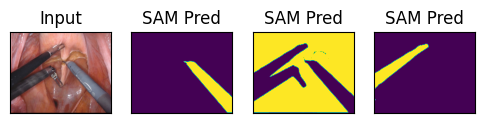

In [7]:
import matplotlib.pyplot as plt

num_img = 4
fig, ax = plt.subplots(1, num_img, figsize=(1.5*num_img,7), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(image)
ax[0].set_title('Input')
ax[1].imshow(masks[0]['segmentation'])
ax[1].set_title('SAM Pred')
ax[2].imshow(masks[1]['segmentation'])
ax[2].set_title('SAM Pred')
ax[3].imshow(masks[2]['segmentation'])
ax[3].set_title('SAM Pred')